In [1]:
!pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
import numpy as np
import matplotlib.pyplot as plt

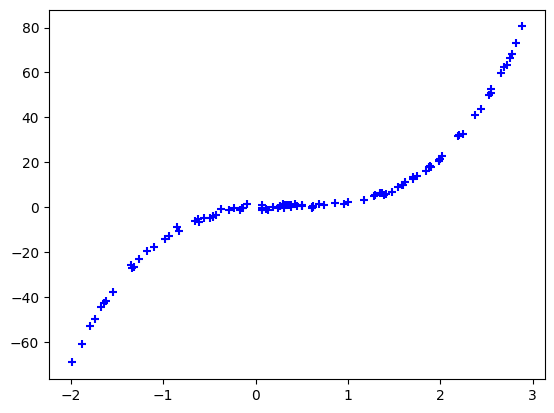

In [3]:
# 数据准备
np.random.seed(7)
x=5 *np.random.rand(100,1)
x-=2
y=5*x**3+-6*x**2+3*x+np.random.randn(100,1)*0.8
plt.scatter(x,y,marker='+',color='blue')

In [4]:
# 数据处理
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
x=torch.from_numpy(x).float()
y=torch.from_numpy(y).float()
dataset=TensorDataset(x,y)
dataloader=DataLoader(dataset,batch_size=16,shuffle=True)

In [5]:
print('Len of DataLoader',len(dataloader))
for index,(data,label) in enumerate(dataloader):
    print(f'index={index},num={len(data):2}')#,data={data},label={label}

Len of DataLoader 7
index=0,num=16
index=1,num=16
index=2,num=16
index=3,num=16
index=4,num=16
index=5,num=16
index=6,num= 4


tensor([-0.0301], requires_grad=True)
tensor([-2.4763], requires_grad=True)
tensor([0.5120], requires_grad=True)


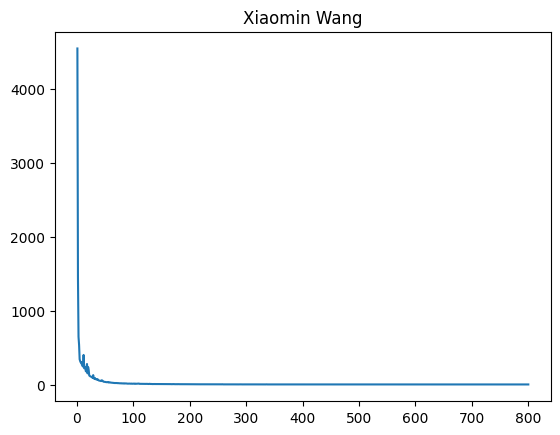

In [6]:
epoch=800
lr=0.00074
a3=torch.randn(1,requires_grad=True)
a2=torch.randn(1,requires_grad=True)
a1=torch.randn(1,requires_grad=True)
a0=torch.randn(1,requires_grad=True)
print(a3)
print(a2)
print(a1)
Loss=[]
for epoch in range(1,epoch+1):
    sum_loss=0
    for batch_id,(bx,by) in enumerate(dataloader):
        h =a3*(bx**3) + a2*(bx**2) + a1*bx +a0
        loss= torch.mean((h-by)**2)
        #print('Loss',loss)
        sum_loss+=loss.item()
        loss.backward()
        a3.data-=lr*a3.grad.data
        a2.data-=lr*a2.grad.data
        a1.data-=lr*a1.grad.data
        a0.data-=lr*a0.grad.data

        a3.grad.zero_()
        a2.grad.zero_()
        a1.grad.zero_()
        a0.grad.zero_()

    Loss.append(sum_loss)
#print(loss.item())
# print(f'w:{w.item()}')
# print(f'b:{b.item()}')
Loss_x=[i for i in range(1,epoch+1)]
plt.plot(Loss_x,Loss)
plt.title("Xiaomin Wang")
plt.show()

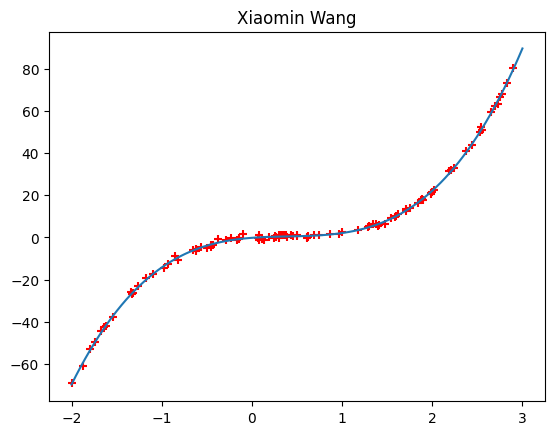

In [7]:
a3=a3.item()
a2=a2.item()
a1=a1.item()
a0=a0.item()
xx=np.linspace(-2,3,100)
h=a3*(xx**3) + a2*(xx**2) + a1*xx +a0
plt.title("Xiaomin Wang")
plt.plot(xx,h)
plt.scatter(x,y,marker='+',color='red')
plt.show()